# Analyzing the Correlation Between NFL Team Offensive/Defensive Performance and Regular Season Win Percentage (2014-2021)

## Motivation

In the realm of NFL analytics, understanding the factors that contribute to a team's success is crucial for both fans, analysts and the front office of the teams themselves. Understanding the correlation between team performance metrics and regular season win percentage is invaluable for NFL front offices when making strategic decisions about building and optimizing their rosters. One key area of investigation is the relationship between team performance metrics, specifically Expected Points Added (EPA) for offense and defense, and the regular season win percentage of NFL teams. This project aims to uncover and analyze the correlations between offensive and defensive EPA metrics and how they align with the success of teams during the regular season. The primary questions we seek to answer are: 
1. Does offensive or defensive success have a higher correlation with regular season success? 
2. How does offensive EPA correlate with regular season win percentage?
3. How does defensive EPA correlate with regular season win percentage?

I chose to utilize EPA as a key metric to represent both offensive and defensive success in NFL teams due to its comprehensive and context-driven nature. Unlike traditional statistics that may oversimplify performance, EPA considers the down, distance, and field position, providing a nuanced understanding of the impact of each play on a team's expected point outcome. I strongly believe in the use of context driven statistics when analyzing football as more traditional stats like yards, touchdowns, interceptions, etc.. often lack the context to provide meaningful insight.

By adopting EPA, the analysis encompasses the dynamic nature of football, allowing for a balanced assessment of offensive and defensive performances. EPA's alignment with the fundamental objectives of scoring and preventing points makes it a fitting choice to gauge overall team success. Moreover, its widespread acceptance in advanced football analytics ensures that the chosen metric is not only meaningful but also allows for meaningful comparisons across teams and seasons. The EPA for a play is calculated by considering the down, distance to the goal line, and field position before and after the play. It takes into account the change in the likelihood of scoring points due to the play. A positive EPA indicates a play that contributes positively to a team's scoring opportunity, while a negative EPA suggests the opposite.

In [2]:
#Importing packagaes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#all data files use only the relevant columns (team names and EPA)
def2014 = pd.read_csv('2014def.csv', usecols=[2, 3]) 
off2014 = pd.read_csv('2014off.csv', usecols=[2, 3])

def2015 = pd.read_csv('2015def.csv', usecols=[2, 3])
off2015 = pd.read_csv('2015off.csv', usecols=[2, 3])

def2016 = pd.read_csv('2016def.csv', usecols=[2, 3])
off2016 = pd.read_csv('2016off.csv', usecols=[2, 3])

def2017 = pd.read_csv('2017def.csv', usecols=[2, 3])
off2017 = pd.read_csv('2017off.csv', usecols=[2, 3])

def2018 = pd.read_csv('2018def.csv', usecols=[2, 3])
off2018 = pd.read_csv('2018off.csv', usecols=[2, 3])

def2019 = pd.read_csv('2019def.csv', usecols=[2, 3])
off2019 = pd.read_csv('2019off.csv', usecols=[2, 3])

def2020 = pd.read_csv('2020def.csv', usecols=[2, 3])
off2020 = pd.read_csv('2020off.csv', usecols=[2, 3])

def2021 = pd.read_csv('2021def.csv', usecols=[2, 3])
off2021 = pd.read_csv('2021off.csv', usecols=[2, 3])

#Reading in win percntage from each year
nflwin14=pd.read_csv('NFL_win.csv', usecols=[0,1])
nflwin15=pd.read_csv('NFL_win.csv', usecols=[0,2])
nflwin16=pd.read_csv('NFL_win.csv', usecols=[0,3])
nflwin17=pd.read_csv('NFL_win.csv', usecols=[0,4])
nflwin18=pd.read_csv('NFL_win.csv', usecols=[0,5])
nflwin19=pd.read_csv('NFL_win.csv', usecols=[0,6])
nflwin20=pd.read_csv('NFL_win.csv', usecols=[0,7])
nflwin21=pd.read_csv('NFL_win.csv', usecols=[0,8])



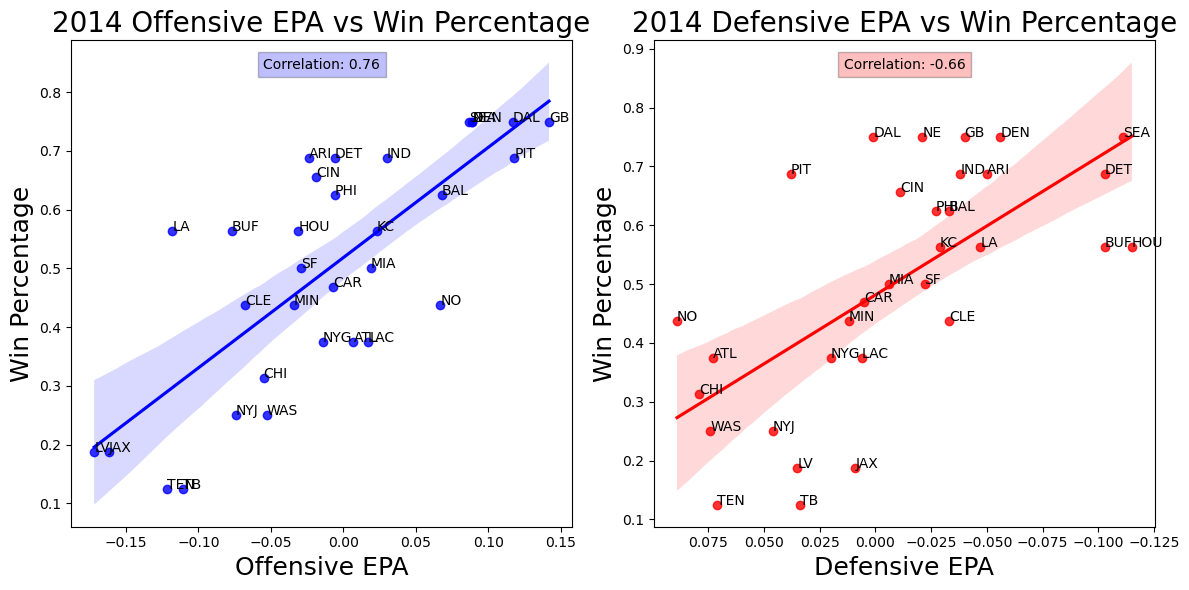

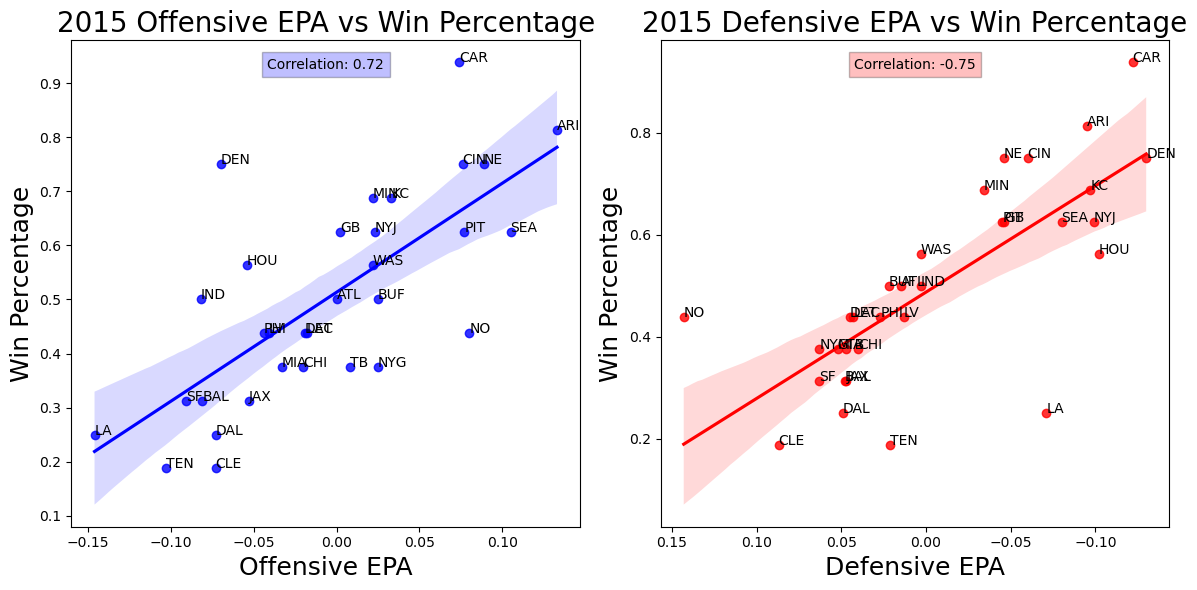

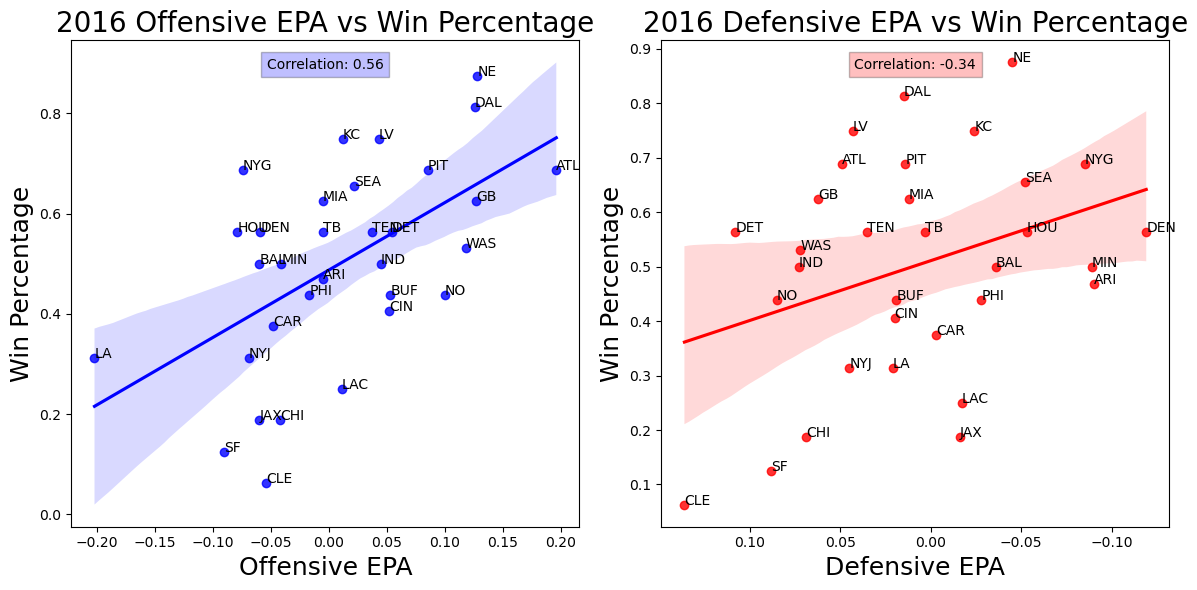

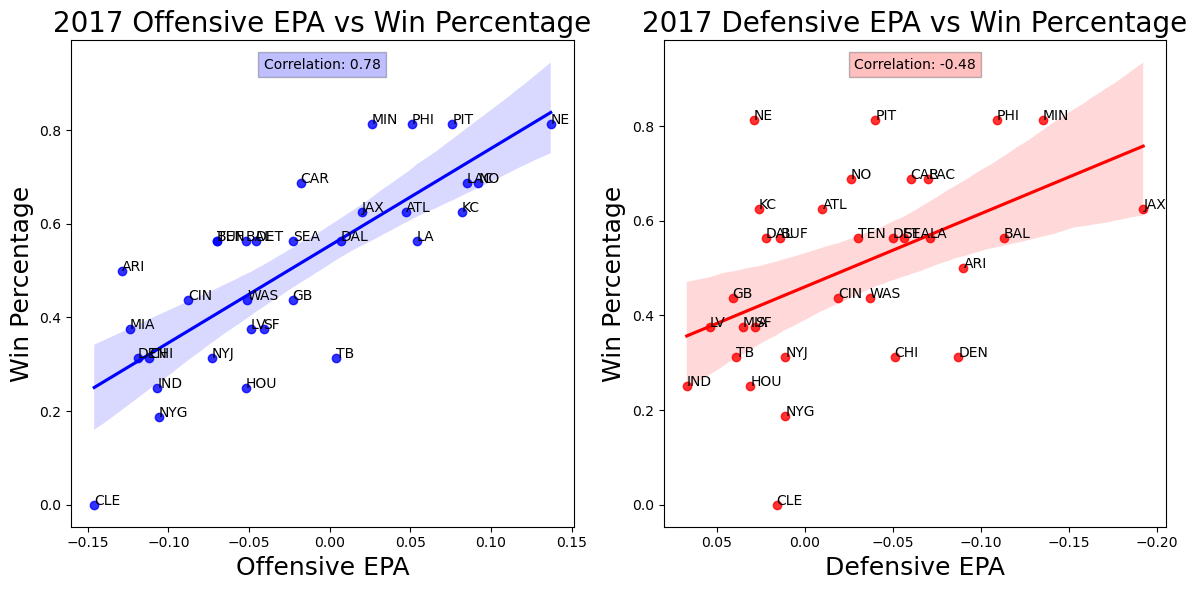

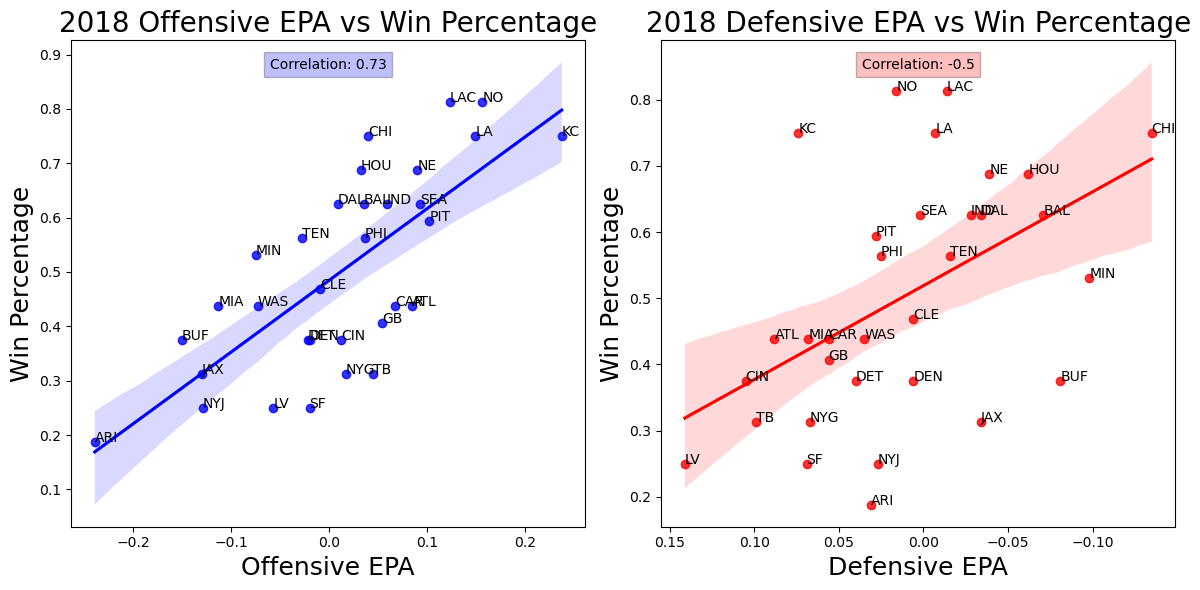

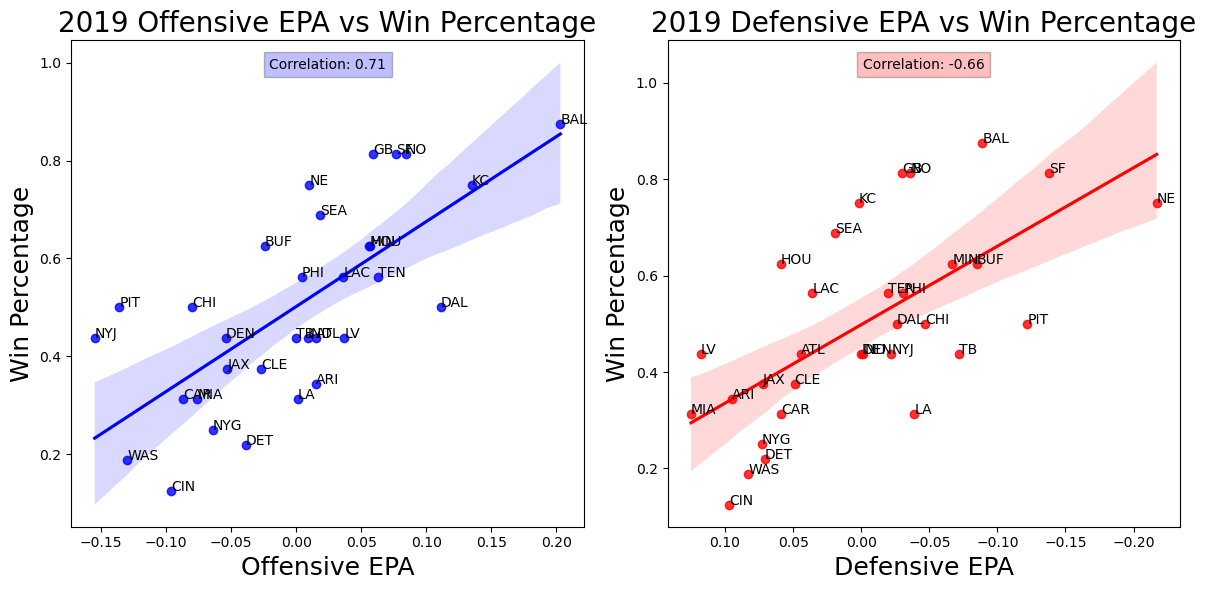

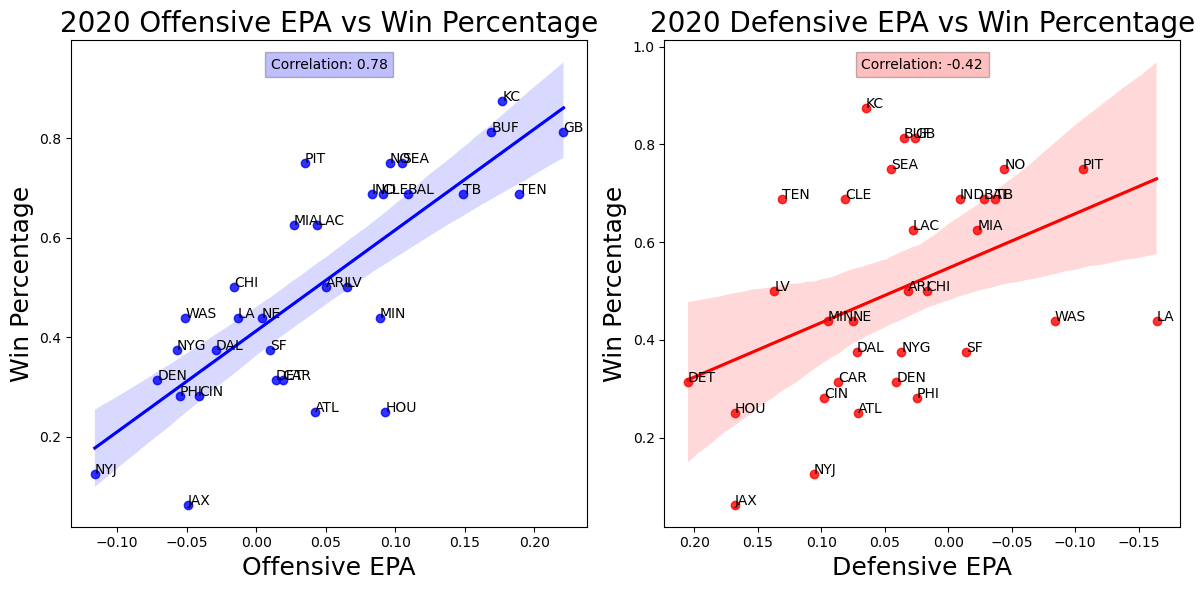

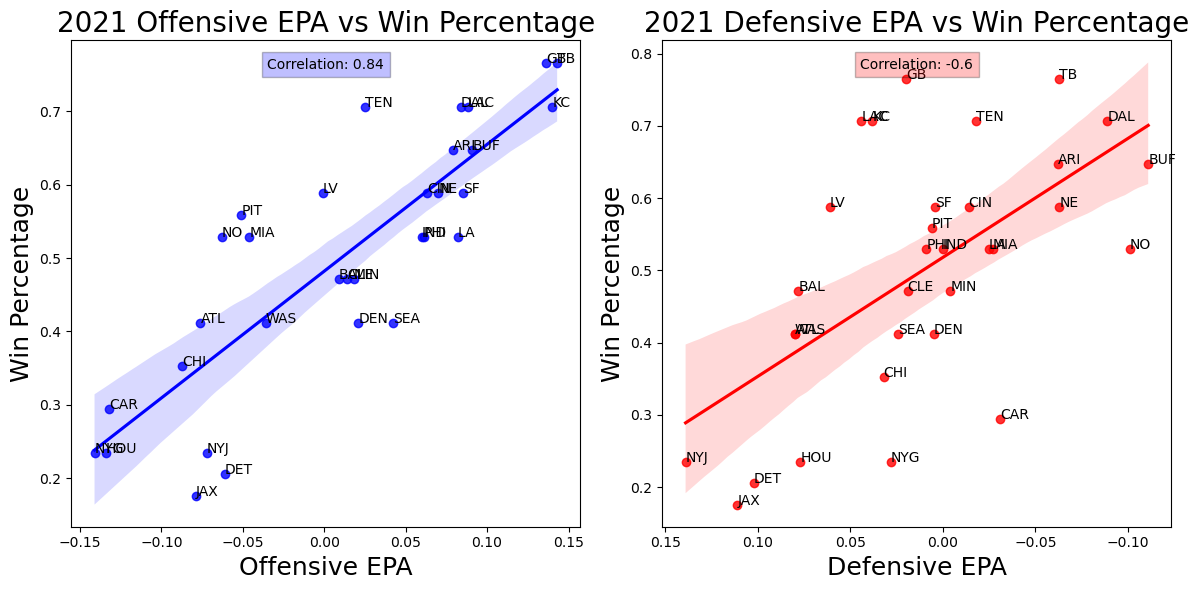

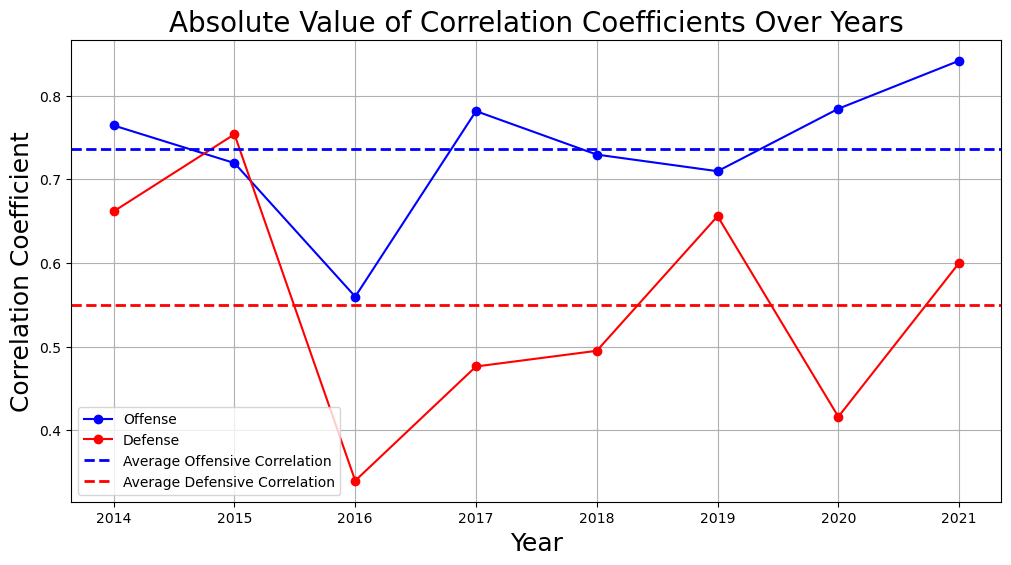

Average absolute correlation between EPA and regular season win percentage between 2014-2021: 0.74
Average absolute correlation between EPA allowed/play and regular season win percentage between 2014-2021: 0.55


In [8]:
#initializes empty lists for the correlation coefficent each year
corr_coeff1=[]
corr_coeff2=[]
def plot_comparison(offensive, defensive, winpct, year):
    
    plt.figure(figsize=(12, 6))
    win_column_name = str(year) 
    
    #sorts all the data files (makes it easier to properly plot)
    offensive = offensive.sort_values(by='Abbr')
    defensive = defensive.sort_values(by='Abbr')
    winpct = winpct.sort_values(by='TEAM')

    # Plot offensive EPA vs win percentage
    plt.subplot(1, 2, 1)
    sns.regplot(x=offensive['EPA/play'], y=winpct[win_column_name], color='blue')
    plt.title(str(year) + ' Offensive EPA vs Win Percentage',fontsize=20)
    plt.xlabel('Offensive EPA',fontsize=18)
    plt.ylabel('Win Percentage',fontsize=18)
    for i in range(offensive.shape[0]): #adds the teams label to each data point
        plt.text(offensive['EPA/play'].iloc[i], winpct[win_column_name].iloc[i], offensive['Abbr'].iloc[i], fontsize=10)
    correlation_coefficient1 = np.corrcoef(offensive['EPA/play'], winpct[win_column_name])[0,1]
    corr_coeff1.append(correlation_coefficient1)
    plt.text(0.5, 0.95, 'Correlation: ' + str(round(correlation_coefficient1, 2)), ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='blue', alpha=0.25)) #adds in the correlation coefficient to each graph
    
    # Plot defensive EPA vs win percentage
    plt.subplot(1, 2, 2)
    sns.regplot(x=defensive['EPA/play'], y=winpct[win_column_name], color='red')
    plt.title(str(year) + ' Defensive EPA vs Win Percentage',fontsize=20)
    plt.xlabel('Defensive EPA',fontsize=18)
    plt.ylabel('Win Percentage',fontsize=18)
    for i in range(defensive.shape[0]): #adds the teams label to each data point
        plt.text(defensive['EPA/play'].iloc[i], winpct[win_column_name].iloc[i], defensive['Abbr'].iloc[i], fontsize=10)
    plt.gca().invert_xaxis() #flips the x axis for defensive graph
    correlation_coefficient2 = np.corrcoef(defensive['EPA/play'], winpct[win_column_name])[0, 1]
    plt.text(0.5, 0.95, 'Correlation: ' + str(round(correlation_coefficient2, 2)), ha='center', va='center',transform=plt.gca().transAxes, bbox=dict(facecolor='red', alpha=0.25)) #adds in the correlation coefficient to each graph
    corr_coeff2.append(correlation_coefficient2)
    
    plt.tight_layout()
    plt.show()

plot_comparison(off2014, def2014, nflwin14, 2014)
plot_comparison(off2015, def2015, nflwin15, 2015)
plot_comparison(off2016, def2016, nflwin16, 2016)
plot_comparison(off2017, def2017, nflwin17, 2017)
plot_comparison(off2018, def2018, nflwin18, 2018)
plot_comparison(off2019, def2019, nflwin19, 2019)
plot_comparison(off2020, def2020, nflwin20, 2020)
plot_comparison(off2021, def2021, nflwin21, 2021)

#Line plot showing the correlation coefficient every year for both sides of the ball
plt.figure(figsize=(12, 6))
plt.plot(range(2014, 2022), np.abs(corr_coeff1), marker='o', label='Offense', color='blue')
plt.plot(range(2014, 2022), np.abs(corr_coeff2), marker='o', label='Defense', color='red')

# axh lines showiung the average correlation for both sides of the ball over the years
plt.axhline(np.mean(np.abs(corr_coeff1)), linestyle='--', color='blue', label='Average Offensive Correlation', linewidth=2)
plt.axhline(np.mean(np.abs(corr_coeff2)), linestyle='--', color='red', label='Average Defensive Correlation', linewidth=2)

plt.title('Absolute Value of Correlation Coefficients Over Years', fontsize=20)  
plt.xlabel('Year', fontsize=18)  
plt.ylabel('Correlation Coefficient', fontsize=18)  
plt.legend()
plt.grid(True)
plt.show()


print('Average absolute correlation between EPA and regular season win percentage between 2014-2021:', round(np.mean(np.abs(corr_coeff1)), 2))
print('Average absolute correlation between EPA allowed/play and regular season win percentage between 2014-2021:', round(np.mean(np.abs(corr_coeff2)), 2))

## Results

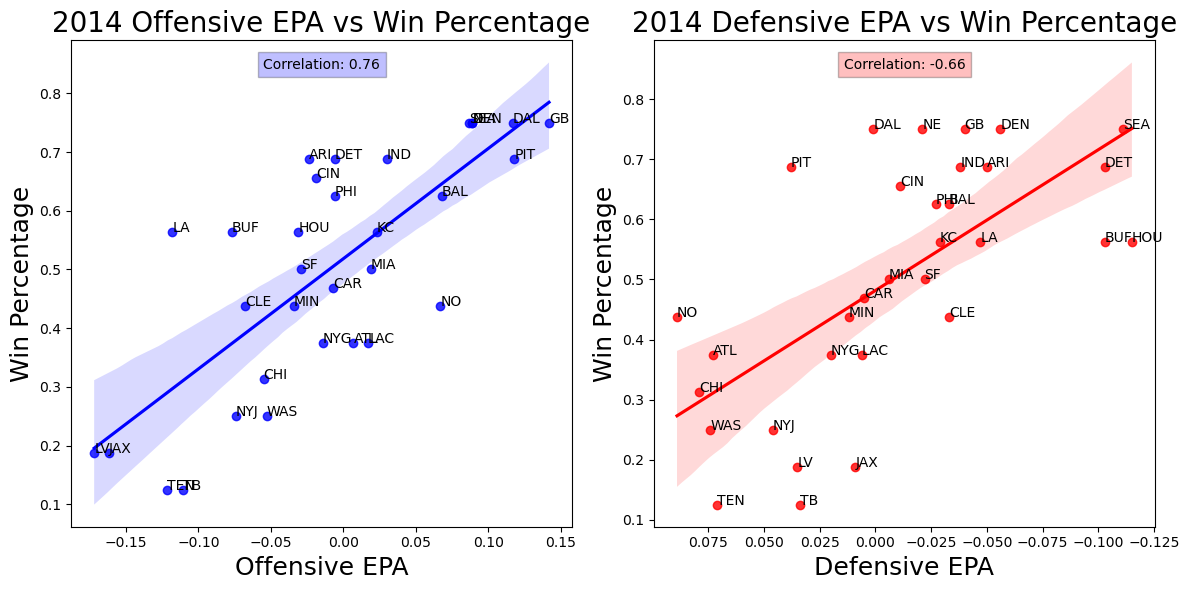
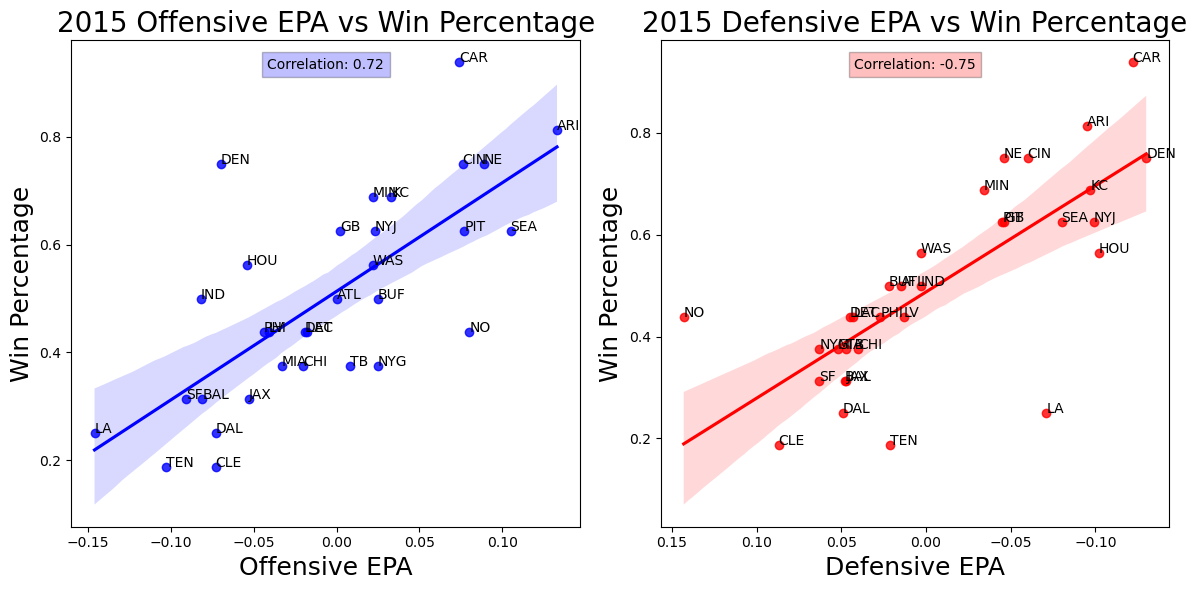
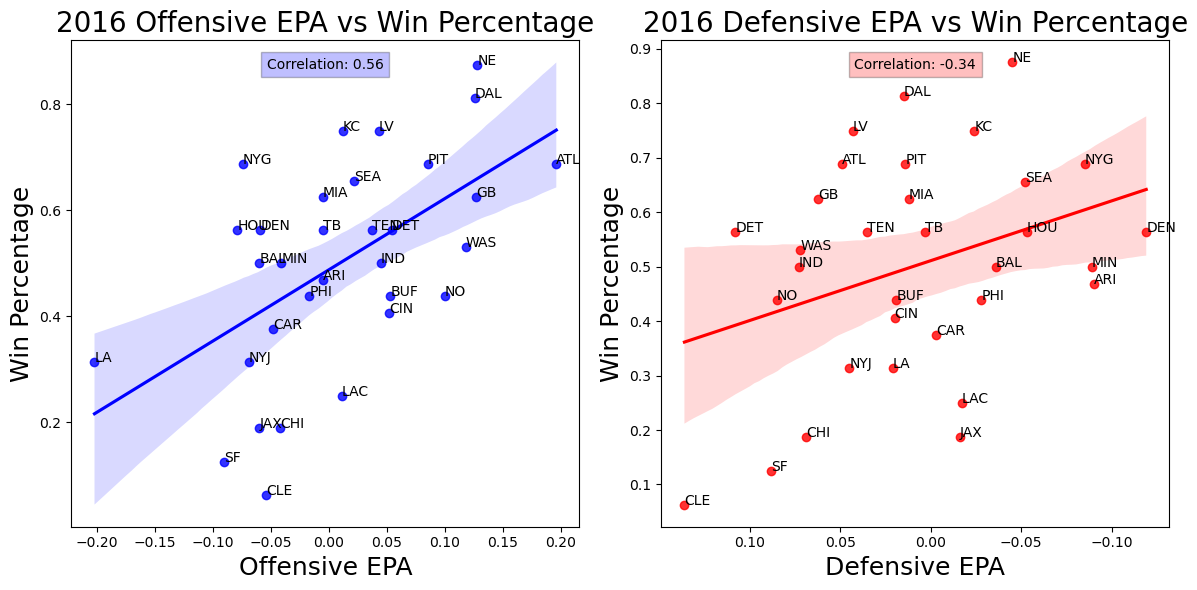
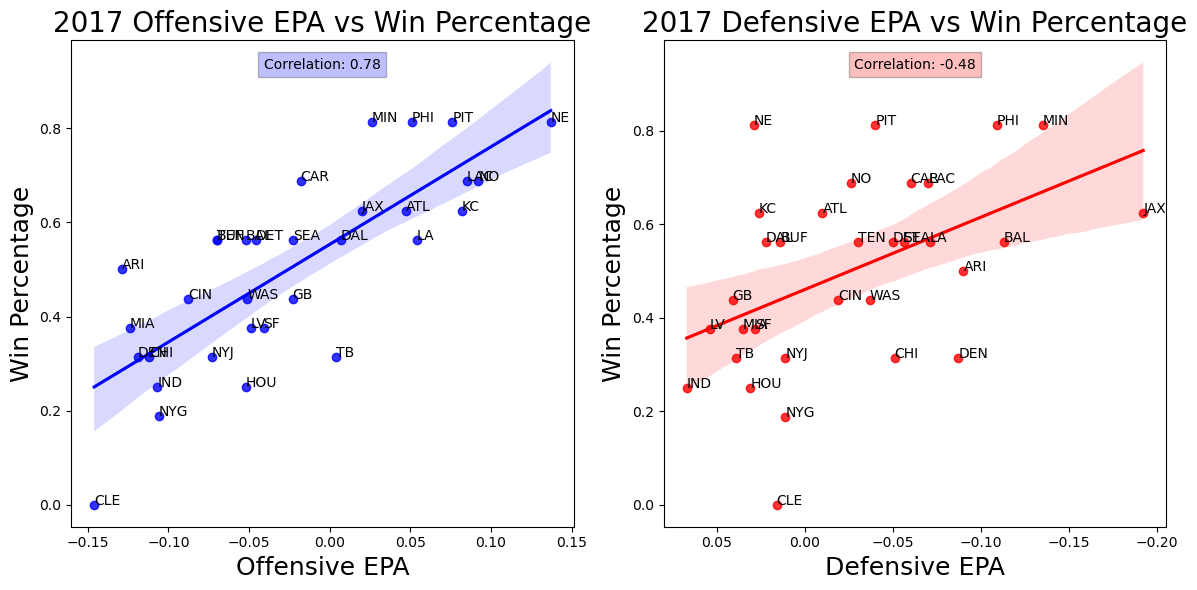
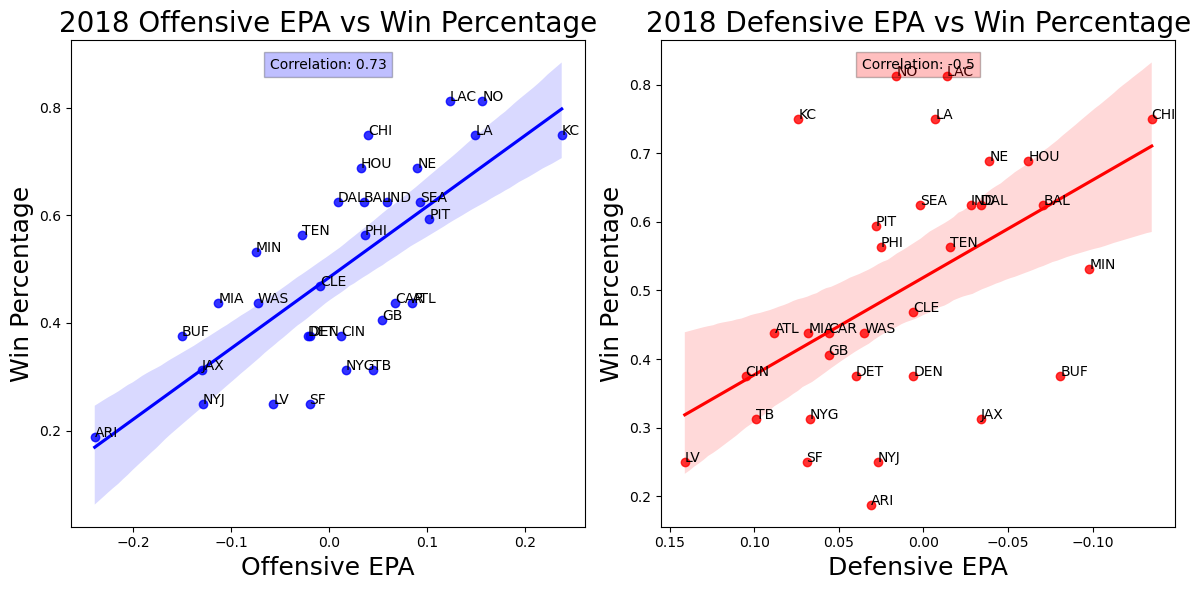
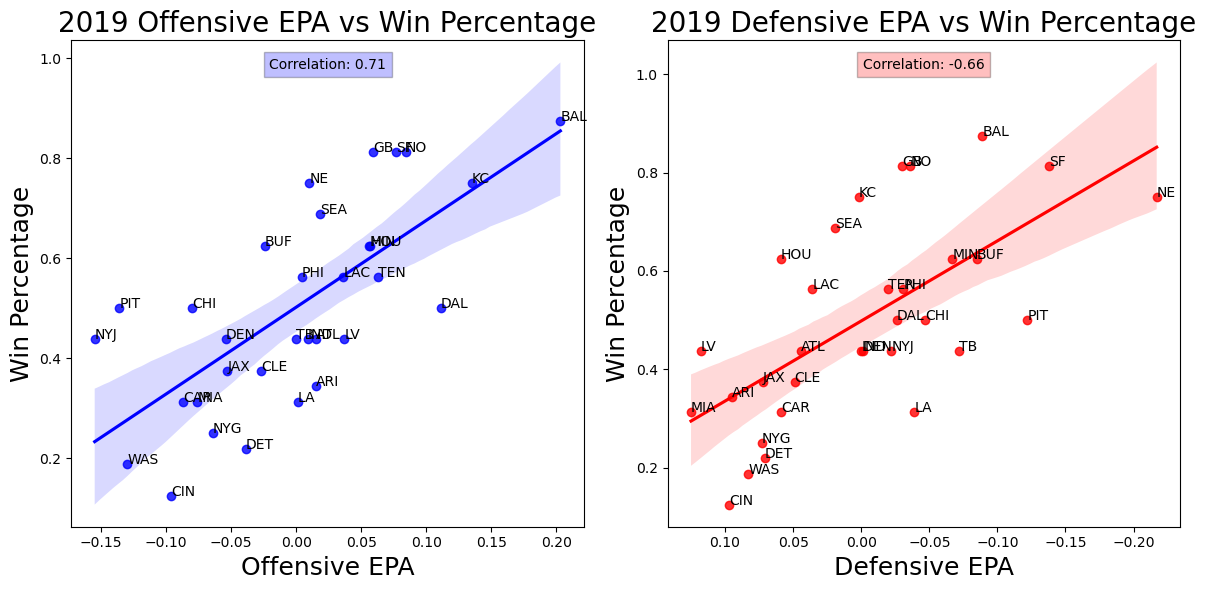
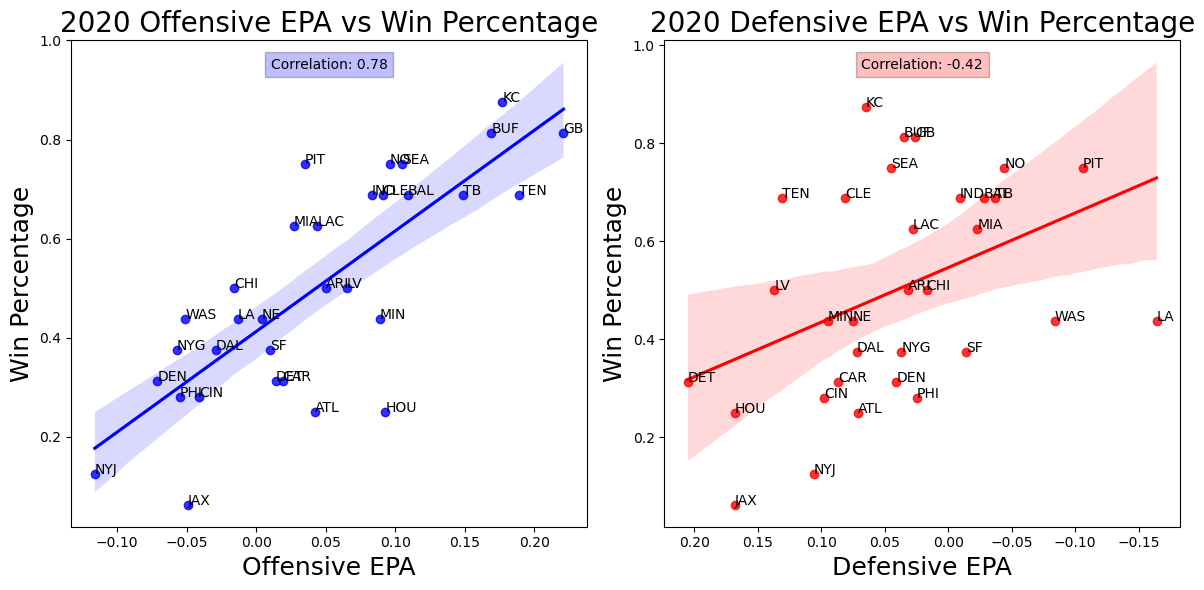
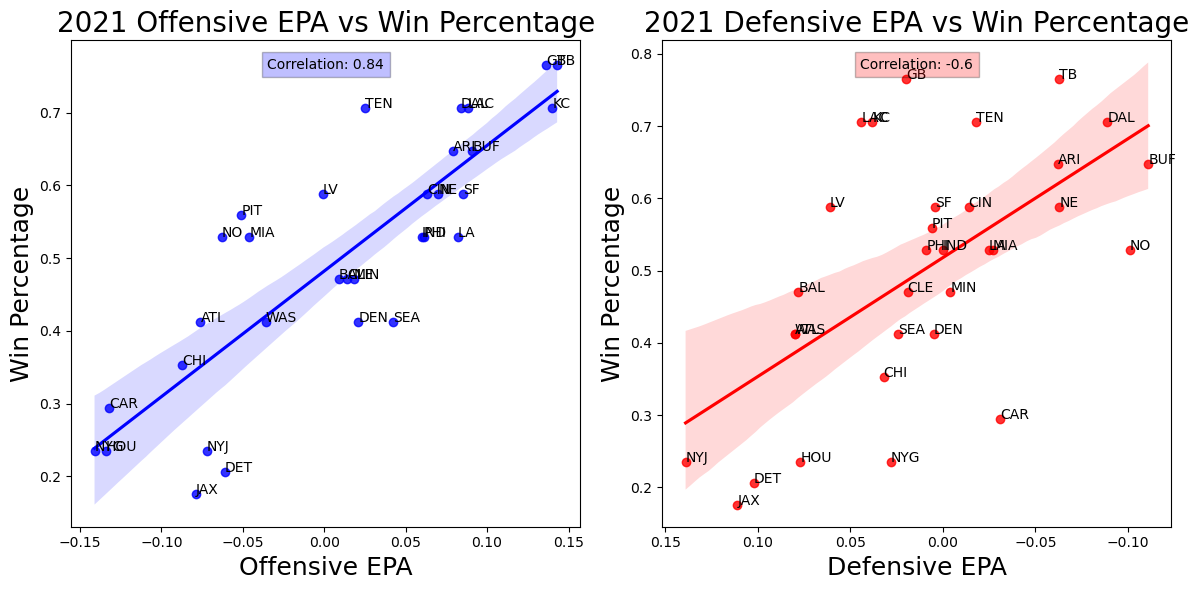
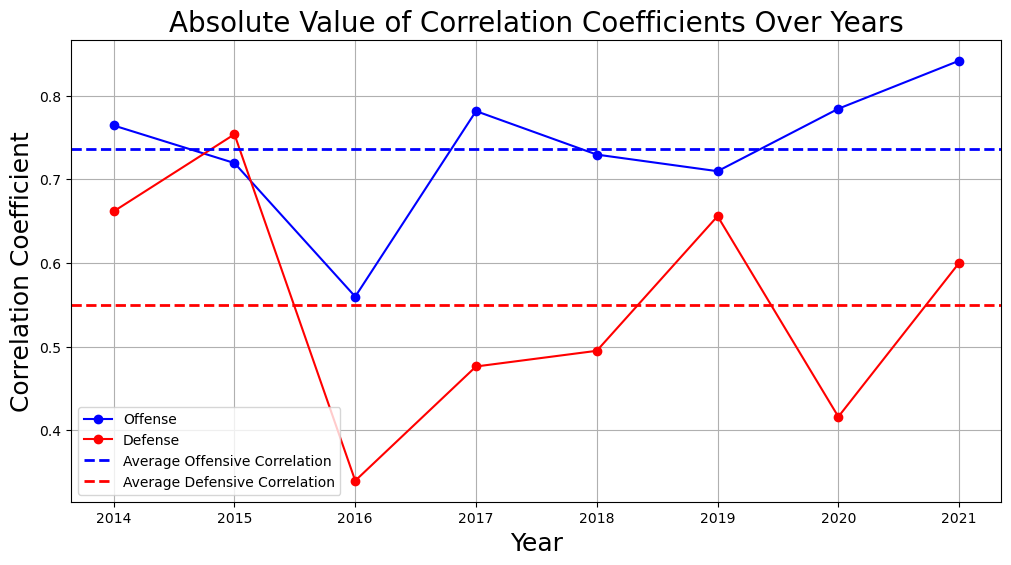


Correlation between EPA and regular season win percentage between 2014-2021: 0.7363312891552181

Correlation between EPA allowed/play and regular season win percentage between 2014-2021: -0.5498698557166499

The data shows that offensive success correalates more with regular season win percntage than defensive success. These are the results I expected considering that the league is seeing new, innovative offensive plays and schemes at an increasing rate. Along with that, league officials continue to add in rules protecting offensive players, making it harder for defensive players to do their job legally. 

## Conclusion



In addressing the central question of whether offensive or defensive success has a higher correlation with regular-season success in the NFL, the analysis provides a clear answer. The correlation coefficient for offensive success, as measured by Expected Points Added, is a notably strong 0.7363. This indicates a positive relationship between a team's offensive efficiency and its regular season win percentage. Therefore, the results affirm that offensive success, as quantified by EPA, has a higher correlation with regular season success compared to defensive performance as the correlation coefficient for defensive success, represented by defensive EPA, is -0.5499. Although the correlation is negative, emphasizing the importance of a strong defense for success, its magnitude is lower than the correlation observed for offensive success. This reaffirms the conclusion that offensive efficiency has a more substantial impact on regular-season success than defensive effectiveness.

For fans, these findings offer a deeper understanding of the factors influencing their favorite team's success. I know that in the next offseason, I'll be rooting for my team to bolster the offense as it is more correlated with regular season success. It is also more fun to watch!

Front offices can leverage these results in strategic decision-making processes. A high positive correlation with offensive EPA suggests that investing in and developing an effective offensive strategy can significantly enhance a team's prospects in the regular season. Front offices can use this information to guide player recruitment, draft strategies, and in-game coaching decisions that aim to maximize offensive efficiency. The data shows that front offices should be investing more in the offensive side of the ball.


### References



Rbsdm.Com/Stats, rbsdm.com/stats/stats/. Accessed 28 Nov. 2023. 


“Official Site of the National Football League.” NFL.Com, www.nfl.com/standings/league/2014/REG. Accessed 28 Nov. 2023. 